In [37]:
import numpy as np # linear algebra
import tensorflow as tf
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [38]:
import glob
gen = [glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]
                 
forg = [glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [41]:
import glob
import keras
import cv2

# gen = glob.glob("../input/handwritten-signatures/sample_Signature/sample_Signature/genuine/*.*")
# forg = glob.glob("../input/handwritten-signatures/sample_Signature/sample_Signature/forged/*.*")
# ../input/handwritten-signatures/sample_Signature/sample_Signature/forged/NFI-00101014.png

train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(0) #genuine = 0
        
for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(1) #forged = 1

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [42]:
print(train_data)
# print(train_labels.shape)

[[[[0.95686275 0.98823529 0.98823529]
   [0.95686275 0.98823529 0.98823529]
   [0.95686275 0.98823529 0.98823529]
   ...
   [0.94117647 0.98431373 0.99215686]
   [0.94509804 0.98431373 0.99215686]
   [0.94901961 0.98823529 0.99215686]]

  [[0.95686275 0.98823529 0.98823529]
   [0.95686275 0.98823529 0.98823529]
   [0.95686275 0.98823529 0.98823529]
   ...
   [0.94117647 0.98431373 0.99215686]
   [0.94509804 0.98431373 0.99215686]
   [0.94901961 0.98823529 0.99215686]]

  [[0.95686275 0.98823529 0.98823529]
   [0.95686275 0.98823529 0.98823529]
   [0.95686275 0.98823529 0.98823529]
   ...
   [0.94117647 0.98431373 0.99215686]
   [0.94509804 0.98431373 0.99215686]
   [0.94901961 0.98823529 0.99215686]]

  ...

  [[0.94901961 0.98823529 0.98823529]
   [0.94901961 0.98823529 0.98823529]
   [0.94901961 0.98823529 0.98823529]
   ...
   [0.94117647 0.98431373 0.99215686]
   [0.94509804 0.98431373 0.98823529]
   [0.94901961 0.98823529 0.98823529]]

  [[0.94901961 0.98823529 0.99215686]
   [0.9

In [43]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

In [75]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Lambda, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, Conv2D, BatchNormalization
# from keras.layers.normalization import Normalization
from keras.regularizers import l2
# from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import RMSprop, Adam

# preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# input_shape = (224, 224, 3)
# # Create the base model from the pre-trained model MobileNet V2
# base_model = tf.keras.applications.MobileNetV2(input_shape=(input_shape),
#                                                include_top=False,
#                                                weights='imagenet'
#                                                )
# base_model.trainable = False

# # create the input layer (Same as the imageNetv2 input size)
# inputs = tf.keras.Input(shape=input_shape)

# # data preprocessing using the same weights the model was trained on
# x = preprocess_input(inputs) 
# x = base_model(x, training=False) 

# # Add the new Binary classification layers
# # use global avg pooling to summarize the info in each channel
# x = tf.keras.layers.GlobalAveragePooling2D()(x) 
# #include dropout with probability of 0.2 to avoid overfitting
# x = tf.keras.layers.Dropout(0.2)(x)

# # global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# prediction_layer = keras.layers.Dense(1, activation="sigmoid")
# outputs = prediction_layer(x)

# network = tf.keras.Model([
#   inputs,
#   outputs
# ])

# # base_learning_rate = 0.001
# network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=['accuracy', tf.metrics.Recall(), tf.metrics.Precision()])

# network.summary()

# # network.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
network.add(MaxPooling2D(3,3))
network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))
network.add(Flatten())
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3))
network.add(Dense(1,activation = 'softmax'))

network.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [76]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
# earlyStopping = EarlyStopping(monitor='val_loss',
#                               min_delta=0,
#                               patience=3,
#                               verbose=1)

# callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 5
BS = 1
progess = network.fit(train_data, train_labels, batch_size=BS,epochs=EPOCHS, validation_split=.05)

Epoch 1/5
513/513 [==============================] - 52s 99ms/step - loss: 0.7879 - accuracy: 0.4932 - val_loss: 0.6949 - val_accuracy: 0.6296
Epoch 2/5
513/513 [==============================] - 55s 107ms/step - loss: 0.7326 - accuracy: 0.4932 - val_loss: 0.6974 - val_accuracy: 0.6296
Epoch 3/5
513/513 [==============================] - 45s 87ms/step - loss: 0.7297 - accuracy: 0.4932 - val_loss: 0.6928 - val_accuracy: 0.6296
Epoch 4/5
513/513 [==============================] - 53s 104ms/step - loss: 0.7102 - accuracy: 0.4932 - val_loss: 0.7690 - val_accuracy: 0.6296
Epoch 5/5
513/513 [==============================] - 69s 135ms/step - loss: 0.7724 - accuracy: 0.4932 - val_loss: 0.6908 - val_accuracy: 0.6296


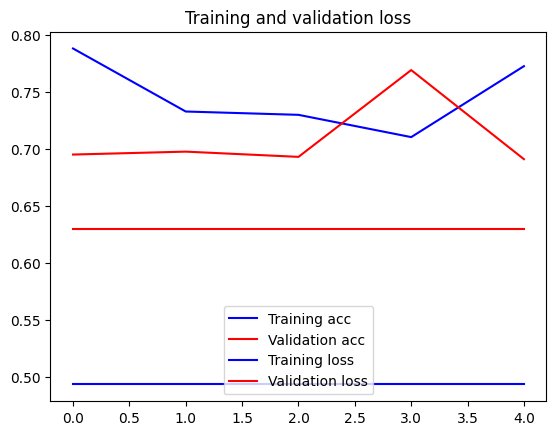

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [77]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [78]:
pred = network.predict(test_data)
pred

6/6 [==============================] - 4s 621ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [55]:
test_loss, test_acc = network.evaluate(test_data, test_labels, verbose=1) 
print("Test Accuracy:", test_acc)

6/6 [==============================] - 6s 719ms/step - loss: 0.8321 - accuracy: 0.7167
Test Accuracy: 0.7166666388511658


In [50]:
network.save("ver2_mobilenetv2.h5")